# 导入数据包

In [3]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

# 生成测试数据

In [77]:
def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x=t.arange(-1,1,0.02)
    #x = t.linspace(-1,1,batch_size)
    #y = 6*x.sin()+2*x.cos()*7+5*x**3+3*x+t.randn(batch_size)
    y=((x**2-1)**3+1)*((2*x).cos()+0.6*(1.3*x).sin())  
    return x, y

# 绘制测试数据图

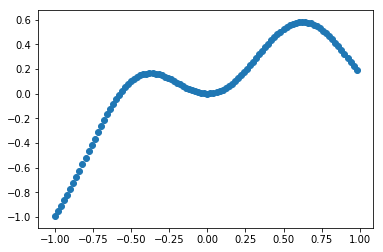

In [78]:
xx,yy=get_fake_data(30)
plt.scatter(xx, yy)

# 曲线拟合
多项式曲线拟合损失函数的矩阵形式是$$Loss(w)=\frac 1 2 (Xw-Y)^T(Xw-Y)$$

损失函数的导数为0，既：$$\frac {\partial} {\partial w}  Loss(w)=X^T(XW-Y)$$

## 最小二乘法拟合
最小二乘法拟合就是令损失函数的导数为零，计算多项式系数
$$w=(X^TX)^{-1}X^TY$$

In [104]:
def leastSquareRegresion(x,y,order):
    xx=t.ones(order+1,x.size(0))
    for i in range(1,order+1):
        xx[i]=x**i
    xt=xx.t()    
    #w=np.dot(np.dot(np.linalg.inv(np.dot(XT,X)),XT),Y)
    w=xt
    print(w.size())
    w=w.mm(xx)
    print(w.size())
    w=w.inverse()
    print(w.size())
    w=w.mm(xt)
    w=w.t()
    print(w.size())
    y=y.unsqueeze(1)
    print(y.size())
    w=w.mm(y)
    print(w.size())
    #w=mt.mm(m)
    #w=w.inverse()
    #w=w.mm(mt)
    return w


In [119]:
w=leastSquareRegresion(xx,yy,15)

torch.Size([100, 16])
torch.Size([100, 100])
torch.Size([100, 100])
torch.Size([16, 100])
torch.Size([100, 1])
torch.Size([16, 1])


In [120]:
print(yy.size())
print(m.size())

torch.Size([100])
torch.Size([8, 4])


In [121]:
w

tensor([[  -5.6124],
        [  -1.5259],
        [  -6.0104],
        [ -14.1366],
        [ -10.2870],
        [  64.3905],
        [  49.3168],
        [-151.9910],
        [-115.7338],
        [ 113.5749],
        [   0.8491],
        [  21.6494],
        [ 139.5002],
        [ -95.7813],
        [ -88.5055],
        [  34.0256]])